In [1]:
# import packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


## Set up parameters, create isochrone grid

In [2]:
# Define the range and increment for age array
start = 1e6  # 1 million
end = 20e6   # 20 million
increment = 0.5e6  # 500,000

# Create log age array
age_arr = np.arange(start, end + increment, increment)
print(age_arr)
age_arr = np.log10(age_arr)
print(age_arr)

[ 1000000.  1500000.  2000000.  2500000.  3000000.  3500000.  4000000.
  4500000.  5000000.  5500000.  6000000.  6500000.  7000000.  7500000.
  8000000.  8500000.  9000000.  9500000. 10000000. 10500000. 11000000.
 11500000. 12000000. 12500000. 13000000. 13500000. 14000000. 14500000.
 15000000. 15500000. 16000000. 16500000. 17000000. 17500000. 18000000.
 18500000. 19000000. 19500000. 20000000.]
[6.         6.17609126 6.30103    6.39794001 6.47712125 6.54406804
 6.60205999 6.65321251 6.69897    6.74036269 6.77815125 6.81291336
 6.84509804 6.87506126 6.90308999 6.92941893 6.95424251 6.97772361
 7.         7.0211893  7.04139269 7.06069784 7.07918125 7.09691001
 7.11394335 7.13033377 7.14612804 7.161368   7.17609126 7.1903317
 7.20411998 7.21748394 7.23044892 7.24303805 7.25527251 7.26717173
 7.2787536  7.29003461 7.30103   ]


In [3]:
# define other isochrone parameters
AKs = 3
dist = 4500
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
# filt_list = ['jwst,F162M', 'jwst,F200W']
filt_list = ['jwst,F162M', 'jwst,F182M', 'jwst,F200W', 'jwst,F212N']
iso_dir = 'isochrones/'

In [4]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(age_arr), dtype=object)

for i in range(len(age_arr)):
    print("create isochrone with age " + str(i + 1) + " of " + str(len(age_arr)))
    my_iso = synthetic.IsochronePhot(age_arr[i], AKs, dist, metallicity=0,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

create isochrone with age 1 of 39
create isochrone with age 2 of 39
create isochrone with age 3 of 39
create isochrone with age 4 of 39
create isochrone with age 5 of 39
create isochrone with age 6 of 39
create isochrone with age 7 of 39
create isochrone with age 8 of 39
create isochrone with age 9 of 39
create isochrone with age 10 of 39
create isochrone with age 11 of 39
create isochrone with age 12 of 39
create isochrone with age 13 of 39
create isochrone with age 14 of 39
create isochrone with age 15 of 39
create isochrone with age 16 of 39
create isochrone with age 17 of 39
create isochrone with age 18 of 39
create isochrone with age 19 of 39
create isochrone with age 20 of 39
create isochrone with age 21 of 39
create isochrone with age 22 of 39
create isochrone with age 23 of 39
create isochrone with age 24 of 39
create isochrone with age 25 of 39
create isochrone with age 26 of 39
create isochrone with age 27 of 39
create isochrone with age 28 of 39
create isochrone with age 29 

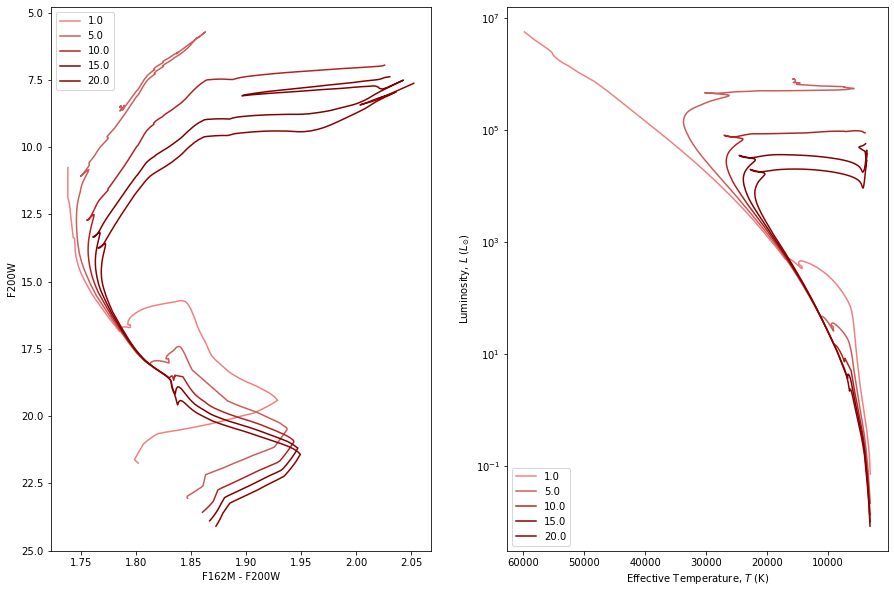

In [5]:
# identify array indeces, create array for labels and colors
idx_arr = [0, 8, 18, 28, 38]

label_arr = np.empty(len(idx_arr))
for i in range(len(idx_arr)):
    label_arr[i] = (idx_arr[i] / 2) + 1
    
color_arr = ["lightcoral", "indianred", "firebrick", "maroon", "darkred"]
    
# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    py.plot(instances[idx].points['m_jwst_F162M'] - instances[idx].points['m_jwst_F200W'], 
           instances[idx].points['m_jwst_F200W'], color_arr[i], label=label_arr[i])
    
py.xlabel('F162M - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()

# Plot HR
py.subplot(1, 2, 2)
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    data_iso_Lsun = instances[idx].points['L'] * watts_to_lsun
    py.plot(instances[idx].points['Teff'], data_iso_Lsun, color_arr[i], label=label_arr[i])
    
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()
py.legend()

In [6]:
'''
# sample interpolation for star with 5.3 Myr age and 10 Msun mass
age = 5.3
mass = 10

# extract stars from 5 Myr and 5.5 Myr isochrone to interpolate between
s1 = np.where( abs(instances[8].points['mass'] - mass) == min(abs(instances[8].points['mass'] - mass)) )[0]
s1_mass = np.round(instances[8].points[s1[0]]['mass'], decimals=3)
s1_teff = np.round(instances[8].points[s1[0]]['Teff'], decimals=3)
s1_logg = np.round(instances[8].points[s1[0]]['logg'], decimals=3)
s1_f162m = np.round(instances[8].points[s1[0]]['m_jwst_F162M'], decimals=3)
s1_f200w = np.round(instances[8].points[s1[0]]['m_jwst_F200W'], decimals=3)
print('5 Myr: Mass = {0}, Effective Temp = {1}, LogG = {2}, F162M = {3} mag, F200W = {4} mag'
      .format(s1_mass, s1_teff, s1_logg, s1_f162m, s1_f200w,))

s2 = np.where( abs(instances[9].points['mass'] - mass) == min(abs(instances[9].points['mass'] - mass)) )[0]
s2_mass = np.round(instances[9].points[s2[0]]['mass'], decimals=3)
s2_teff = np.round(instances[9].points[s2[0]]['Teff'], decimals=3)
s2_logg = np.round(instances[9].points[s2[0]]['logg'], decimals=3)
s2_f162m = np.round(instances[9].points[s2[0]]['m_jwst_F162M'], decimals=3)
s2_f200w = np.round(instances[9].points[s2[0]]['m_jwst_F200W'], decimals=3)
print('5.5 Myr: Mass = {0}, Effective Temp = {1}, LogG = {2}, F162M = {3} mag, F200W = {4} mag'
      .format(s2_mass, s2_teff, s2_logg, s2_f162m, s2_f200w,))

v = math.sqrt((10.077 - 9.847)**2 + (5 - 5.5)**2 + (24789.909 - 24473.14)**2)
dd1 = math.sqrt((10.077 - 9.847)**2 + (5 - 5.5)**2)
dd2 = math.sqrt((10 - 9.847)**2 + (5.3 - 5.5)**2)
i_teff = s2_teff + (dd2/dd1)*v
print(i_teff)
'''
'''
bilinear interpolation using 3d vector, 
axed in favor of linear interpolation using two separately interpolated points along two isochrones
'''

'\nbilinear interpolation using 3d vector, \naxed in favor of linear interpolation using two separately interpolated points along two isochrones\n'

## Manual Implementation of Interpolation Routine

In [7]:
# desired age and mass of interpolated star
age = 5.3
mass = 10

filter1 = 'm_jwst_F162M'
filter2 = 'm_jwst_F200W'
filters = [filter1, filter2]

a1 = 0
a2 = 0

# identify isochrones, find the two isochrones that bracket the desired age
for i in range(len(age_arr) - 1):
    if np.power(10, age_arr[i]) <= age * 1000000 <= np.power(10, age_arr[i + 1]):
        a1 = i
        a2 = i + 1
        break

print(a1, a2)
print(np.power(10, age_arr[a1]), np.power(10, age_arr[a2]))

8 9
4999999.999999999 5500000.000000004


In [8]:
# interpolate to 10 Msun for 5.0 Myr isochrone

# extract closest star to 10 Msun
s11_idx = np.where(abs(instances[a1].points['mass'] - mass) == min(abs(instances[a1].points['mass'] - mass)))[0].item()
print(s11_idx)
s11_mass = np.round(instances[a1].points[s11_idx]['mass'], decimals=3)
s11_teff = np.round(instances[a1].points[s11_idx]['Teff'], decimals=3)
s11_logg = np.round(instances[a1].points[s11_idx]['logg'], decimals=3)
s11_filt1 = np.round(instances[a1].points[s11_idx][filter1], decimals=3)
s11_filt2 = np.round(instances[a1].points[s11_idx][filter2], decimals=3)
s11 = [s11_mass, s11_teff, s11_logg, s11_filt1, s11_filt2]
# print(s11)
print('5.0 Myr: Mass = {0}, Effective Temp = {1}, LogG = {2},  Filter 1 = {3} mag, Filter 2 = {4} mag'
      .format(s11_mass, s11_teff, s11_logg, s11_filt2, s11_filt2))

# extract next star to interpolate along isochrone
if(s11_mass < mass):
    s12_idx = s11_idx + 1
else:
    s12_idx = s11_idx - 1
s12_mass = np.round(instances[a1].points[s12_idx]['mass'], decimals=3)
s12_teff = np.round(instances[a1].points[s12_idx]['Teff'], decimals=3)
s12_logg = np.round(instances[a1].points[s12_idx]['logg'], decimals=3)
s12_filt1 = np.round(instances[a1].points[s12_idx][filter1], decimals=3)
s12_filt2 = np.round(instances[a1].points[s12_idx][filter2], decimals=3)
s12 = [s12_mass, s12_teff, s12_logg, s12_filt2, s12_filt2]
# print(s12)
print('5.0 Myr: Mass = {0}, Effective Temp = {1}, LogG = {2},  Filter 1 = {3} mag, Filter 2 = {4} mag'
      .format(s12_mass, s12_teff, s12_logg, s12_filt1, s12_filt2))

w11 = (s12_mass - mass) / (s12_mass - s11_mass)
w12 = 1.0 - w11

# Interpolate the properties
s1_mass = mass
s1_teff = w11 * s11_teff + w12 * s12_teff
s1_logg = w11 * s11_logg + w12 * s12_logg
s1_filt1 = w11 * s11_filt1 + w12 * s12_filt1
s1_filt2 = w11 * s11_filt2 + w12 * s12_filt2

# Store the interpolated values in s1
s1 = [s1_mass, s1_teff, s1_logg, s1_filt1, s1_filt2]
# print(s1)
print('5.0 Myr: Mass = {0}, Effective Temp = {1}, LogG = {2},  Filter 1 = {3} mag, Filter 2 = {4} mag'
      .format(s1_mass, s1_teff, s1_logg, s1_filt1, s1_filt2))

227
5.0 Myr: Mass = 10.077, Effective Temp = 24789.909, LogG = 4.179,  Filter 1 = 15.3 mag, Filter 2 = 15.3 mag
5.0 Myr: Mass = 9.923, Effective Temp = 24612.217, LogG = 4.183,  Filter 1 = 17.097 mag, Filter 2 = 15.336 mag
5.0 Myr: Mass = 10, Effective Temp = 24701.063000000002, LogG = 4.181,  Filter 1 = 17.079 mag, Filter 2 = 15.318000000000001 mag


In [9]:
# repeat interpolation, but for second isochrone

# extract closest star to 10 Msun
s21_idx = np.where(abs(instances[a2].points['mass'] - mass) == min(abs(instances[a2].points['mass'] - mass)))[0].item()
s21_mass = np.round(instances[a2].points[s21_idx]['mass'], decimals=3)
s21_teff = np.round(instances[a2].points[s21_idx]['Teff'], decimals=3)
s21_logg = np.round(instances[a2].points[s21_idx]['logg'], decimals=3)
s21_filt1 = np.round(instances[a2].points[s21_idx][filter1], decimals=3)
s21_filt2 = np.round(instances[a2].points[s21_idx][filter2], decimals=3)
s21 = [s21_mass, s21_teff, s21_logg, s21_filt1, s21_filt2]
# print(s21)
print('5.5 Myr: Mass = {0}, Effective Temp = {1}, LogG = {2}, Filter 1 = {3} mag, Filter 2 = {4} mag'
      .format(s21_mass, s21_teff, s21_logg, s21_filt1, s21_filt2))

# extract next star to interpolate along isochrone
if(s21_mass < mass):
    s22_idx = s21_idx + 1
else:
    s22_idx = s21_idx - 1
s22_mass = np.round(instances[a2].points[s22_idx]['mass'], decimals=3)
s22_teff = np.round(instances[a2].points[s22_idx]['Teff'], decimals=3)
s22_logg = np.round(instances[a2].points[s22_idx]['logg'], decimals=3)
s22_filt1 = np.round(instances[a2].points[s22_idx][filter1], decimals=3)
s22_filt2 = np.round(instances[a2].points[s22_idx][filter2], decimals=3)
s22 = [s22_mass, s22_teff, s22_logg, s22_filt1, s22_filt2]
# print(s22)
print('5.5 Myr: Mass = {0}, Effective Temp = {1}, LogG = {2}, Filter 1 = {3} mag, Filter 2 = {4} mag'
      .format(s22_mass, s22_teff, s22_logg, s22_filt1, s22_filt2))

w21 = (s22_mass - mass) / (s22_mass - s21_mass)
w22 = 1.0 - w21

# Interpolate the properties
s2_mass = mass
s2_teff = w21 * s21_teff + w22 * s22_teff
s2_logg = w21 * s21_logg + w22 * s22_logg
s2_filt1 = w21 * s21_filt1 + w22 * s22_filt1
s2_filt2 = w21 * s21_filt2 + w22 * s22_filt2

# Store the interpolated values in s1
s2 = [s2_mass, s2_teff, s2_logg, s2_filt1, s2_filt2]
# print(s2)
print('5.5 Myr: Mass = {0}, Effective Temp = {1}, LogG = {2}, Filter 1 = {3} mag, Filter 2 = {4} mag'
      .format(s2_mass, s2_teff, s2_logg, s2_filt1, s2_filt2))

5.5 Myr: Mass = 9.979, Effective Temp = 24625.964, LogG = 4.171, Filter 1 = 17.06 mag, Filter 2 = 15.299 mag
5.5 Myr: Mass = 10.158, Effective Temp = 24828.734, LogG = 4.166, Filter 1 = 17.018 mag, Filter 2 = 15.258 mag
5.5 Myr: Mass = 10, Effective Temp = 24649.75265921788, LogG = 4.170413407821229, Filter 1 = 17.055072625698322 mag, Filter 2 = 15.294189944134079 mag


In [10]:
# using two stars of same mass and differing age, perform linear interpolation along age
wa1 = (np.power(10, age_arr[a2]) / 1000000 - age) / (np.power(10, age_arr[a2]) / 1000000 - np.power(10, age_arr[a1]) / 1000000)
wa2 = 1.0 - wa1

# Interpolate the properties
s_age = age
s_teff = wa1 * s1_teff + wa2 * s2_teff
s_logg = wa1 * s1_logg + wa2 * s2_logg
s_filt1 = wa1 * s1_filt1 + wa2 * s2_filt1
s_filt2 = wa1 * s1_filt2 + wa2 * s2_filt2

# Store the interpolated values in s
s = [s_teff, s_logg, s_filt1, s_filt2]

# Truncate values
for i in range(len(s)):
    s[i] = np.round(s[i], decimals = 3)

# print(s)
print('5.3 Myr: Effective Temp = {0}, LogG = {1}, Filter 1 = {2} mag, Filter 2 = {3} mag'
      .format(s[0], s[1], s[2], s[3]))

5.3 Myr: Effective Temp = 24670.277, LogG = 4.175, Filter 1 = 17.065 mag, Filter 2 = 15.304 mag


## Demonstration of Programmatic Interpolation


In [11]:
import interpolator

In [12]:
star1 = interpolator.interpolate(5.3, 10, instances, age_arr, filters)
print('Effective Temp = {0}, LogG = {1}, Filter 1 = {2} mag, Filter 2 = {3} mag'
      .format(star1[0], star1[1], star1[2], star1[3]))

Effective Temp = 24670.277, LogG = 4.175, Filter 1 = 17.065 mag, Filter 2 = 15.304 mag


**Script output matches manual computations**

Generate set of test values for interpolation:

In [13]:
# find mass ranges for isochrones at each age

mins = []
maxes = []

for i in range(38):
    # print(str(i * 0.5 + 0.5) + " Myr")
    
    min = instances[i].points[0]['mass']
    # print(min)
    mins.append(min)
    
    max = instances[i].points[len(instances[i].points) - 1]['mass']
    # print(max)
    maxes.append(max)
    
# print(mins)
# print(maxes)

1.0 Myr
190.93353005876156 Msun
Effective Temp = 57300.727, LogG = 4.084, Filter 1 = 12.829 mag, Filter 2 = 11.091 mag

1.5 Myr
120.09971486173204 Msun
Effective Temp = 55389.043, LogG = 4.096, Filter 1 = 13.388 mag, Filter 2 = 11.65 mag

2.0 Myr
222.74473232032892 Msun
Effective Temp = 63700.595, LogG = 4.146, Filter 1 = 13.574 mag, Filter 2 = 11.836 mag

2.5 Myr
13.094109707709077 Msun
Effective Temp = 28304.036, LogG = 4.183, Filter 1 = 16.587 mag, Filter 2 = 14.833 mag

3.0 Myr
156.41529924938936 Msun
Effective Temp = 136277.338, LogG = 5.455, Filter 1 = 18.316 mag, Filter 2 = 16.578 mag

3.5 Myr
42.89576534620605 Msun
Effective Temp = 37570.434, LogG = 3.698, Filter 1 = 13.709 mag, Filter 2 = 11.964 mag

4.0 Myr
61.24134765489548 Msun
Effective Temp = 12512.9, LogG = 1.269, Filter 1 = 9.154 mag, Filter 2 = 7.357 mag

4.5 Myr
44.06651811339014 Msun
Effective Temp = 26750.265, LogG = 2.982, Filter 1 = 12.473 mag, Filter 2 = 10.718 mag

5.0 Myr
4.511931822127345 Msun
Effective Temp =

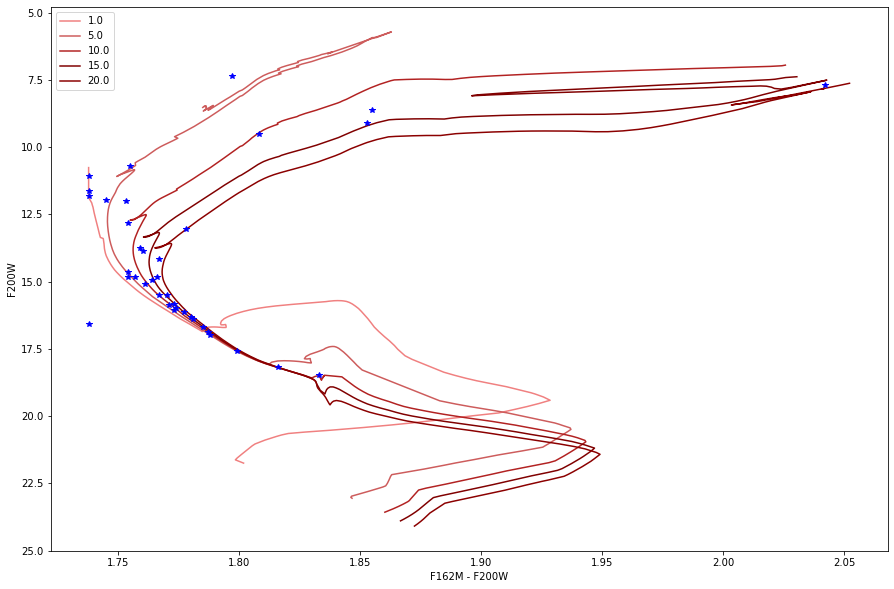

In [20]:
# identify array indeces, create array for labels and colors
idx_arr = [0, 8, 18, 28, 38]

label_arr = np.empty(len(idx_arr))
for i in range(len(idx_arr)):
    label_arr[i] = (idx_arr[i] / 2) + 1
    
color_arr = ["lightcoral", "indianred", "firebrick", "maroon", "darkred"]
    
# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    py.plot(instances[idx].points['m_jwst_F162M'] - instances[idx].points['m_jwst_F200W'], 
           instances[idx].points['m_jwst_F200W'], color_arr[i], label=label_arr[i])
    
py.xlabel('F162M - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()

import random

# For each isochrone, generate a random desired mass and print out the interpolated properties
for i in range(38):
    age = i * 0.5 + 1
    mass = random.uniform(mins[i], maxes[i])
    star = interpolator.interpolate(age, mass, instances, age_arr, filters)
    py.plot(star[2] - star[3], star[3], 'b*')
    print(str(age) + " Myr")
    print(str(mass) + " Msun")
    print('Effective Temp = {0}, LogG = {1}, Filter 1 = {2} mag, Filter 2 = {3} mag'
      .format(star[0], star[1], star[2], star[3]))
    print()

In [ ]:
# Identify 1 Msun, 2Myr star
s_idx = 67
s_mass = np.round(instances[2].points[s_idx]['mass'], decimals=3)
s_teff = np.round(instances[2].points[s_idx]['Teff'], decimals=3)
s_logg = np.round(instances[2].points[s_idx]['logg'], decimals=3)
s_filt1 = np.round(instances[2].points[s_idx][filter1], decimals=3)
s_filt2 = np.round(instances[2].points[s_idx][filter2], decimals=3)
s = [s_mass, s_teff, s_logg, s_filt1, s_filt2]
print('Mass = {0}, Effective Temp = {1}, LogG = {2},  Filter 1 = {3} mag, Filter 2 = {4} mag'
      .format(s_mass, s_teff, s_logg, s_filt2, s_filt2))

# Test interpolator for same star
si = interpolator.interpolate(2, 0.978, instances, age_arr, filters)
print('Effective Temp = {0}, LogG = {1}, Filter 1 = {2} mag, Filter 2 = {3} mag'
      .format(si[0], si[1], si[2], si[3]))